In [1]:
import csv
import pandas as pd

In [2]:
import numpy as np
from sklearn.decomposition import PCA

In [3]:
quarterbacks_df = pd.read_csv('./ProData/csvs/qb_stats.csv', header=0)

In [4]:
player_id_and_age_df = quarterbacks_df[['age', 'player_id']].set_index('player_id')

In [5]:
drop_columns = [col for col in quarterbacks_df.columns if col.startswith(('catch', 'rec', 'targets'))]

In [6]:
drop_columns.extend(['Unnamed: 0', 'team', 'rush_receive_td', 'av'])

In [7]:
qbs_df = quarterbacks_df.drop(drop_columns, axis=1)

## Fill Null
For columns that were always available (not advanced metrics) fill with 0

In [8]:
colums_to_fill_with_zero = [
    'comebacks', 'fumbles', 'gwd', 'losses', 'pass_adj_net_yds_per_att',
    'pass_adj_yds_per_att', 'pass_att', 'pass_cmp', 'pass_cmp_perc', 'pass_first_down',
    'pass_int', 'pass_int_perc', 'pass_long', 'pass_net_yds_per_att',
    'pass_rating', 'pass_sacked', 'pass_sacked_perc', 'pass_sacked_yds',
    'pass_td', 'pass_td_perc', 'pass_yds', 'pass_yds_per_att',
    'pass_yds_per_cmp', 'pass_yds_per_g', 'ties', 'win_percentage', 'wins',
    'rush_att', 'rush_att_per_g','rush_first_down','rush_long','rush_td',
    'rush_yds', 'rush_yds_per_att', 'rush_yds_per_g', 'touches',
    'yds_from_scrimmage'
]
fill_null_object = {key:0 for key in colums_to_fill_with_zero}

In [9]:
df = qbs_df.fillna(value=fill_null_object, axis=0)

## Fillna for each player with the player's average
QBR was only available starting in 2006 and snap data in 2012. For players that span across those time ranges, use their average to fill data from time before it was available.

In [10]:
fillna_cols = ['qbr', 'snap_played_percentage', 'snaps_played', 'total_snaps']

In [11]:
def fill_with_player_averages(group):
    group[fillna_cols] = group[fillna_cols].replace(0, group[fillna_cols].mean())
    group[fillna_cols] = group[fillna_cols].fillna(group[fillna_cols].mean())
    return group

In [12]:
new = df.groupby('player_id', as_index=False).apply(fill_with_player_averages)

In [13]:
new.query('player_id=="BradTo00"')['snap_played_percentage']

0       0.950
8       0.990
29      0.973
160     0.973
206     0.980
214     0.960
216     0.990
248     0.973
356     0.973
461     0.973
541     0.973
563     0.960
654     0.973
717     0.973
806     0.973
891     0.973
943     0.973
1023    0.973
1050    0.980
1060    1.000
1083    0.940
1098    0.980
Name: snap_played_percentage, dtype: float64

## Fill zeros and nulls with all average

In [14]:
new[fillna_cols] = new[fillna_cols].fillna(new[fillna_cols].mean())

In [15]:
new[fillna_cols] = new[fillna_cols].replace(0, new[fillna_cols].mean())

In [16]:
qb_dropna = new.dropna(axis=1)

In [17]:
qb_dropna.columns

Index(['age', 'g', 'gs', 'pass_cmp', 'pass_att', 'pass_cmp_perc', 'pass_yds',
       'pass_td', 'pass_td_perc', 'pass_int', 'pass_int_perc',
       'pass_first_down', 'pass_long', 'pass_yds_per_att',
       'pass_adj_yds_per_att', 'pass_yds_per_cmp', 'pass_yds_per_g',
       'pass_rating', 'qbr', 'pass_sacked', 'pass_sacked_yds',
       'pass_sacked_perc', 'pass_net_yds_per_att', 'pass_adj_net_yds_per_att',
       'comebacks', 'gwd', 'rush_att', 'rush_yds', 'rush_td',
       'rush_first_down', 'rush_long', 'rush_yds_per_att', 'rush_yds_per_g',
       'rush_att_per_g', 'touches', 'yds_from_scrimmage', 'fumbles',
       'snaps_played', 'total_snaps', 'snap_played_percentage', 'wins',
       'losses', 'ties', 'win_percentage', 'player_id', 'position'],
      dtype='object')

In [26]:
age_group = qb_dropna.groupby('age').mean().reset_index('age')

# Plot Age vs Feature

In [19]:
import matplotlib.pyplot as plt

In [29]:
age_group = age_group[age_group['age'] != 0]

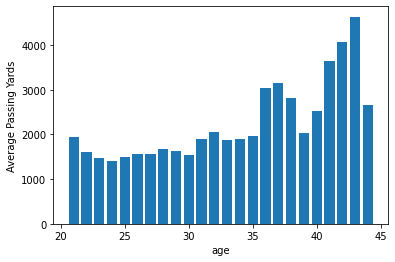

In [34]:
fig = plt.figure()
plt.bar(age_group['age'], age_group['pass_yds'])
plt.xlabel('age')
plt.ylabel('Average Passing Yards')
plt.title('Average Passing Yards vs. Age')
plt.show()

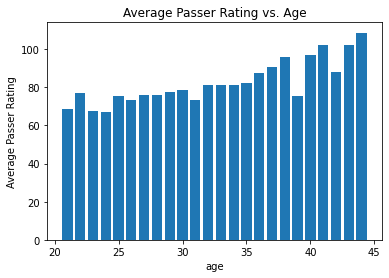

In [35]:
fig = plt.figure()
plt.bar(age_group['age'], age_group['pass_rating'])
plt.xlabel('age')
plt.ylabel('Average Passer Rating')
plt.title('Average Passer Rating vs. Age')
plt.show()

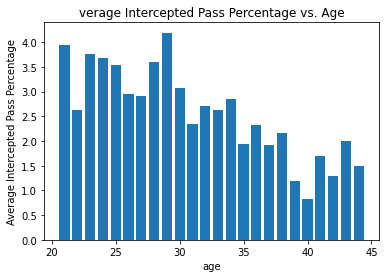

In [36]:
fig = plt.figure()
plt.bar(age_group['age'], age_group['pass_int_perc'])
plt.xlabel('age')
plt.ylabel('Average Intercepted Pass Percentage')
plt.title('verage Intercepted Pass Percentage vs. Age')
plt.show()

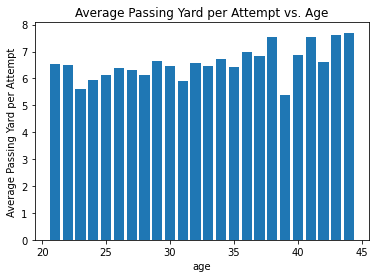

In [37]:
fig = plt.figure()
plt.bar(age_group['age'], age_group['pass_yds_per_att'])
plt.xlabel('age')
plt.ylabel('Average Passing Yard per Attempt')
plt.title('Average Passing Yard per Attempt vs. Age')
plt.show()